In [1]:

import collections
from datetime import datetime
from IPython.display import clear_output, display, HTML
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from pathlib import Path
import pickle
import scipy
# import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import sys
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
from matplotlib.patches import Rectangle
import warnings
from scipy.ndimage import gaussian_filter1d
from wfOpto import *
warnings.filterwarnings("ignore")

In [2]:
#work
plt.style.use(r'C:\Users\nadia\Documents\GitHub\steinmetzlab\ALpres.mplstyle')

In [4]:
#personal
plt.style.use(r'C:\GitHub\steinmetzlab\ALpres.mplstyle')

### importing

#### opto

In [3]:
dataOp820_AL34=wfOpto(Path(r'Y:\Subjects\AL_0034\2024-08-20\1'))

#### stimdur

In [ ]:
dataSt521_AB=wfOpto(Path(r'Y:\Subjects\AB_0032\2024-05-21\1'))

In [ ]:
dataSt523_AB=wfOpto(Path(r'Y:\Subjects\AB_0032\2024-05-23\1'))

In [ ]:
dataSt620_AB=wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-20\3'))

In [ ]:
# with sine
dataSt625_AB=wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-25\1'))

In [ ]:
#with sine
dataSt627_AB=wfOpto(Path(r'Y:\Subjects\AB_0032\2024-06-27\3'))

In [ ]:
dataSt624_AL=wfOpto(Path(r'Y:\Subjects\AL_0033\2024-06-24\1'))

In [ ]:
#with sine
dataSt627_AL=wfOpto(Path(r'Y:\Subjects\AL_0033\2024-06-27\1'))

#### visresp

all of these - WITHOUT FLICKER!!! 

In [ ]:
#one location
dataVis809=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-09\1'))

In [ ]:
#one location
dataVis814=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-14\1'))

In [103]:
#one location
dataVis815=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-15\1'))

In [87]:
#all 3 locations
dataVis823=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-23\3'))

In [80]:
print(np.unique(dataVis823.galvoX))
print(np.unique(dataVis823.galvoY))

[-0.]
[-0.   1.5  2.5]


In [78]:
#3 locations
dataVis824=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-24\1'))

In [59]:
#3 locations
dataVis825=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-25\2'))

flicker stuff starts

In [116]:
#with flicker and then without
#:1350 and 1350:1800
dataVis830=wfOpto(Path(r'Y:\Subjects\AL_0023\2023-08-30\1'),[np.r_[:1350], np.r_[1350:1800]])

In [58]:
#no flicker, idk params cause i was stupid
dataVis427_AL=wfOpto(Path(r'Y:\Subjects\AL_0032\2024-04-27\1'))

ValueError: x and y arrays must be equal in length along interpolation axis.

In [ ]:
#with flicker
dataVis428_AL=wfOpto(Path(r'Y:\Subjects\AL_0032\2024-04-28\1'))

In [4]:
#with flicker
datavis610_AL=wfOpto(Path(r'Y:\Subjects\AL_0032\2024-06-10\1'))

In [5]:
#no flicker
dataVis611_AL=wfOpto(Path(r'Y:\Subjects\AL_0032\2024-06-11\1'))

In [11]:
# process 830
power = 3
pixel = (410, 428)
n_samples = 650
timestamps = np.linspace(-0.3, 1, n_samples)*1000

pixel_ix = np.ravel_multi_index((428, 410), (dataVis.py, dataVis.px))
pows = np.argwhere(dataVis.laserPowers[dataVis.listExps[0]] == power).ravel()
onTimes = dataVis.laserOn[dataVis.listExps[0]][pows]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

flicker = []
for iT, tr in enumerate(trs):
    wf = dataVis.tToWFManual(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = dataVis.svdSpat[pixel_ix] @ dwf
    flicker.append(mov)
flicker = np.array(flicker)

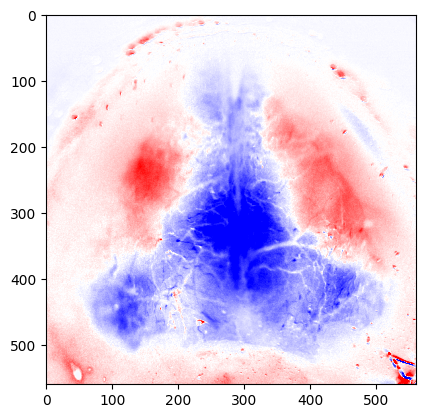

In [12]:
theseTrs = np.argwhere(dataOp.laserPowers==2).ravel()
trial_time_all = [np.linspace(i+-.3, i+1, 100) for i in theseTrs]
trial_activity_all = dataOp.tToWf(trial_time_all)
trial_activity_all = np.mean(trial_activity_all, axis=0)

dwf = [np.diff(i, prepend=i[0]) for i in trial_activity_all]
dwf = np.array(dwf)

avg_trial_activity = np.mean(dwf, axis=1)

spatial = dataOp.svdSpatFull.reshape(560*560, -1)
videoAvg = spatial @ dwf.T
videoAvg = videoAvg.reshape(560,560,-1)
videoAvg = np.mean(videoAvg, axis=2)
plt.imshow(videoAvg, cmap='bwr',clim = np.percentile(videoAvg, (2, 99.9)))

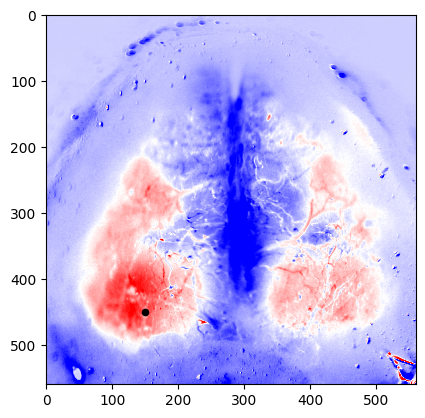

In [46]:

galvoX_val=0
galvoY_val=-0
galvoX=np.argwhere(dataOp3.galvoX==-galvoX_val).ravel()
galvoY=np.argwhere(dataOp3.galvoY==galvoY_val).ravel()

px = np.intersect1d(galvoY,galvoX)
pows = np.argwhere(dataOp3.laserPowers==2).ravel()
theseTrs=np.intersect1d(px,pows)
trial_time_all = [np.linspace(i+-.3, i+1, 100) for i in theseTrs]
trial_activity_all = dataOp3.tToWf(trial_time_all)
trial_activity_all = np.mean(trial_activity_all, axis=0)

dwf = [np.diff(i, prepend=i[0]) for i in trial_activity_all]
dwf = np.array(dwf)

avg_trial_activity = np.mean(dwf, axis=1)

spatial = dataOp.svdSpatFull.reshape(560*560, -1)
videoAvg = spatial @ dwf.T
videoAvg = videoAvg.reshape(560,560,-1)
videoAvg = np.mean(videoAvg, axis=2)
plt.imshow(videoAvg, cmap='bwr',clim = np.percentile(videoAvg, (2, 99.9)))
plt.scatter(x=150,y=450,s=20,color='black')

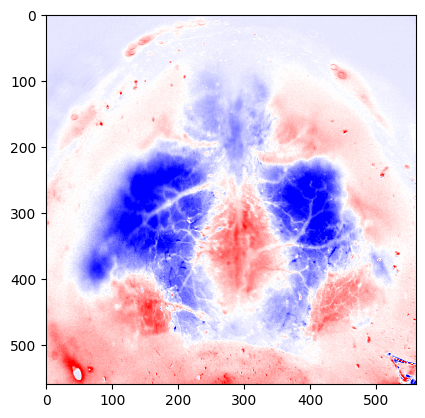

In [18]:
theseTrs = np.argwhere(dataOp4.laserPowers==2).ravel()
trial_time_all = [np.linspace(i+-.3, i+1, 100) for i in theseTrs]
trial_activity_all = dataOp4.tToWf(trial_time_all)
trial_activity_all = np.mean(trial_activity_all, axis=0)

dwf = [np.diff(i, prepend=i[0]) for i in trial_activity_all]
dwf = np.array(dwf)

avg_trial_activity = np.mean(dwf, axis=1)

spatial = dataOp.svdSpatFull.reshape(560*560, -1)
videoAvg = spatial @ dwf.T
videoAvg = videoAvg.reshape(560,560,-1)
videoAvg = np.mean(videoAvg, axis=2)
plt.imshow(videoAvg, cmap='bwr',clim = np.percentile(videoAvg, (2, 99.9)))

### figure 1: intro

- the technique works via viral injection of opsin + gcamp.
- we can track brain activity against stimulus using WF and it corresponds with ephys results. 
- we can make pretty images of the brain that correspond to the pixel values we use in analysis.

In [64]:
def brainImg(ax,data,frame,galvoX=0,galvoY=0,power=2,n_samples=650,start=-.3,end=1,X=150,Y=350,colorbarlabel='Brin Activity dF/F',title='',loccolor='left'):
    '''
    image of the brain
    can change where you stim (galvoX, galvoY),
        power you stimulate with, frame you take as peak,
        and samples in trial
        frame which you take your img from, just a single one
    '''
    pows = np.argwhere(data.laserPowers==power).ravel()
    galvoYTrs=np.argwhere(data.galvoY==galvoY)
    galvoXTrs=np.argwhere(data.galvoX==galvoX)
    loc=np.intersect1d(galvoXTrs,galvoYTrs)
    theseTrs=np.intersect1d(loc,pows)

    onTimes = data.laserOn[theseTrs]
    trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    wf = np.mean(data.tToWFManual(trs),axis=0)
    mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
    mov = mov.reshape(560,560,-1)
    meanimg = data.meanImage.reshape(560,560,-1)
    mov_mean_dff = mov/meanimg
        
    plt.imshow(mov_mean_dff[:,:,frame], cmap='bwr', clim=np.percentile(mov_mean_dff, (2, 99.9)))
    plt.title(f'{title}')
    plt.colorbar(location=loccolor,label=colorbarlabel)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')

In [5]:
def microscope(ax):
    '''
    shows the light path, path of commands
    '''
    plt.title('microscope')
    plt.xticks([])
    plt.yticks([])
def geneExpression(ax):
    '''
    shows histology, expression of opsin + calcium
    '''
    plt.title('gene expression')
    plt.xticks([])
    plt.yticks([])


In [79]:
def wfTrace(ax,data,powers,galvoX,galvoY,y,x,width=15,n_samples=650,xlim=[-300,600],ylim=[-0.1,0.04],lenpows=11,anchor=(1,1),title='',cols=2,ylabel=True):
    '''
    '''
    if len(powers)<3:
        colors=['deepskyblue','dodgerblue','mediumblue']
    else:
        colors=plt.cm.Blues(np.linspace(.3,1,lenpows))
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
    galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
    loc=np.intersect1d(galvoXTr,galvoYTr)

    for power in powers:
        pwTrs = np.argwhere(data.laserPowers == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))

        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity

        mov_mean_dff = videoROI/avg
        trace=np.mean(mov_mean_dff,axis=(0,1))
        pxPowers.append(trace)

    powerscorr = [round(i/2.777777778,2) for i in powers]
    lines = [plt.plot(timestamps, y, label=f'{powerscorr[i]} mW',color=colors[i])[0] for i, y in enumerate(pxPowers)]

    for iP, power in enumerate(pxPowers):
        # plt.plot(timestamps, power,linewidth=2,label=powers[iP],color=colors[iP])
        plt.fill_between(timestamps, \
                power-scipy.stats.sem(power,axis=0),\
                power+scipy.stats.sem(power,axis=0), color=colors[iP],label='_nolegend_',alpha=.5,linewidth=0)
    legend = plt.legend(ncols=cols,loc='upper right',bbox_to_anchor=anchor,fontsize='x-small',\
                        columnspacing=0.5,handletextpad=0.3)

    # Change the color of the text in the legend to match the line colors
    for text, line in zip(legend.get_texts(), lines):
        text.set_color(line.get_color())
    # Optionally, remove the lines and markers from the legend
    for legend_line in legend.get_lines():
        legend_line.set_linewidth(0)
    for legend_marker in legend.get_patches():
        legend_marker.set_visible(False)

    plt.xlabel('Time (ms)',fontsize=10)
    if ylabel:
        plt.ylabel('Brain Activity df/f',fontsize=10)
    plt.title(f'{title}',fontsize=13)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.axvspan(0,100,color='gray',alpha=.2,lw=0,label='_nolegend_')
    plt.ylim(ylim)
    plt.xlim(xlim)

In [7]:
def ephys(ax):
    '''
    trace of ephys to contrast with the single pixel activity plot
    '''
    plt.title('ephys activity')
    plt.xticks([])
    plt.yticks([])


#### panels

In [17]:
np.unique(dataOp820_AL34.laserPowers)

array([0.1, 0.2, 0.5, 0.7, 1. , 1.5, 1.7, 2. , 2.5, 3. , 3.2])

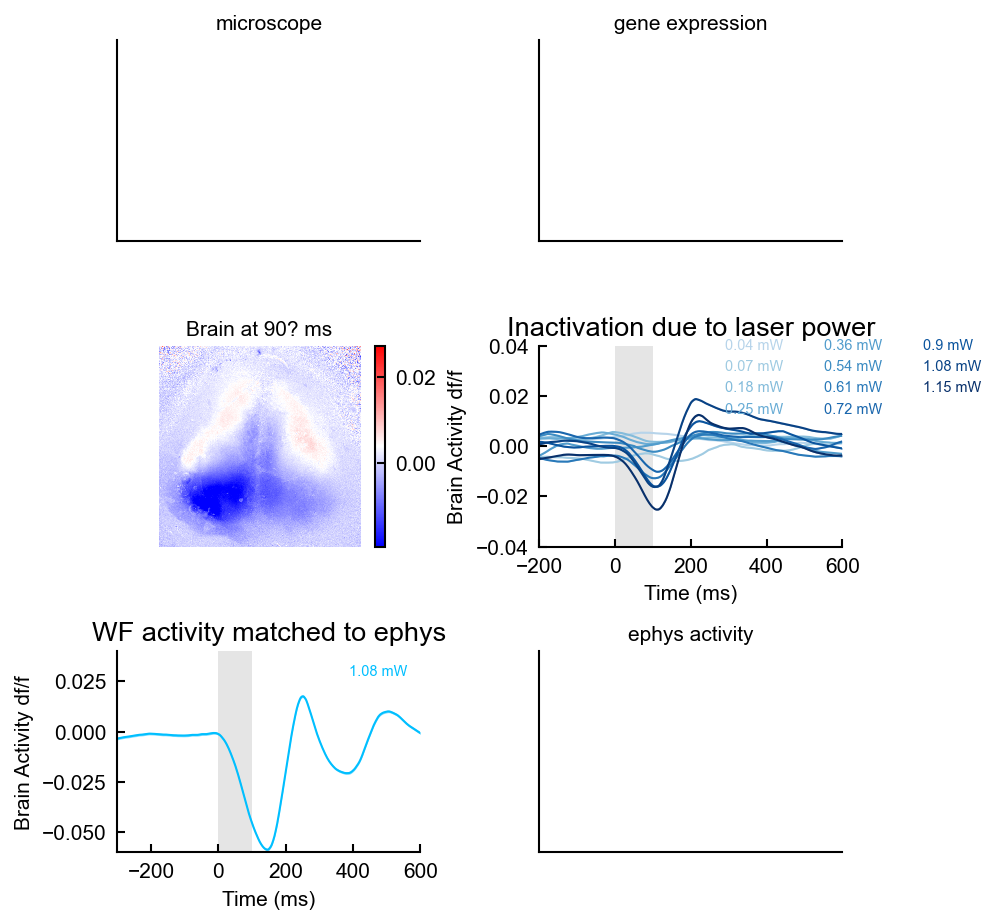

In [37]:
# figure plotting
data=dataOp820_AL34
galvoX=0
galvoY=3
x=170
y=410
xlim=[-200,600]
f = plt.figure(figsize=(7,12))
gs=mpl.gridspec.GridSpec(6,2)

ax = plt.subplot(gs[0])
microscope(ax)

ax = plt.subplot(gs[1])
geneExpression(ax)

ax = plt.subplot(gs[2])
brainImg(ax,data=data,galvoX=galvoX,galvoY=galvoY,power=3,n_samples=100,\
         frame=50,colorbarlabel='',title='Brain at 90? ms')

ax = plt.subplot(gs[3])
wfTrace(ax,data=data,powers=np.unique(data.laserPowers),\
            galvoX=galvoX,galvoY=galvoX,x=x,y=y,xlim=xlim,ylim=[-0.04,0.04],\
            title='Inactivation due to laser power',anchor=(1.5,1.1))

ax = plt.subplot(gs[4])
wfTrace(ax,data=data,powers=[3],\
        galvoX=galvoX,galvoY=galvoY,x=x,y=y,ylim=[-0.06,0.04],\
        title='WF activity matched to ephys')

ax = plt.subplot(gs[5])
ephys(ax)

f.tight_layout()

### figure 2: visresp

- In control mice (no opsin) red laser at certain powers and locations evokes response in visual cortex. 
- The magnitude of the visual response is reduced by adapting the retina with flicker. 
- There exists a range of laser powers that inactive neurons while not evoking a detectable visual response. 
- Light intensities used for fluorescence imaging do not drive opsin. 


In [38]:
dataVis819=wfOpto(Path(r'Y:\Subjects\ZYE_0087\2024-08-19\1'))

In [39]:
def visRespCompare(ax,data,ylim,exptrs=np.array([0,600,1200]),power=2.5,galvoX=0,galvoY=0,x=120,y=380,width=15,n_samples=300,labels=['No Flicker','Flicker']):
    '''
    trace of response in VC compared with and without flicker 
    '''
    pxPowers = []
    colors=['forestgreen','orange']
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    #this depends on mouse (and maybe day) !!!!!
    
    for i in range(2):
        tr1 = exptrs[i]
        tr2 = exptrs[i+1]
        pwTrs = np.argwhere(data.laserPowers[tr1:tr2] == power).ravel()
        galvoXTrs=np.argwhere(data.galvoX[tr1:tr2]==galvoX).ravel()
        galvoYTrs=np.argwhere(data.galvoY[tr1:tr2]==galvoY).ravel()
        loc=np.intersect1d(galvoXTrs,galvoYTrs)
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
        mov_mean_dff = videoROI/avg
        avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
        pxPowers.append(avgOverRoi)

    for i,iP in enumerate(pxPowers):
        plt.plot(timestamps, iP, color=colors[i],label=labels[i],lw=2)
        plt.fill_between(timestamps, \
                iP-scipy.stats.sem(iP,axis=0),\
                iP+scipy.stats.sem(iP,axis=0), color=colors[i], label='_nolegend_',alpha=.3,linewidth=0)
        
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    plt.xlabel('Time (ms)',fontsize=10)
    plt.title(f'Response in VC', fontsize=13)
    plt.axvspan(0,100,color='gray',alpha=.2,lw=0,label='_nolegend_')
    plt.legend()
    plt.ylim(ylim)

In [85]:
def visRespQuantCompare(ax,data,ylim,exptrs=np.array([0,600,1200]),time=190,galvoX=0,galvoY=0,x=120,y=380,width=15,n_samples=300,labels=['No Flicker','Flicker']):
    '''
    peak of visual activity in VC compared with flicker and no flicker
    '''
    colors=['forestgreen','orange']
    powers = np.unique(data.laserPowers).ravel()
    lenpws = len(powers)
    quantCompare = np.zeros((2,lenpws),dtype=float)
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    labels=['No Flicker', 'Flicker']

    for i in range(2):
        pxPowers=[]
        tr1 = exptrs[i]
        tr2 = exptrs[i+1]
        galvoXTrs=np.argwhere(data.galvoX[tr1:tr2]==galvoX).ravel()
        galvoYTrs=np.argwhere(data.galvoY[tr1:tr2]==galvoY).ravel()
        loc=np.intersect1d(galvoXTrs,galvoYTrs)
        for iP, power in enumerate(powers):
            pwTrs = np.argwhere(data.laserPowers[tr1:tr2] == power).ravel()
            theseTrs=np.intersect1d(pwTrs,loc)
            onTimes = data.laserOn[theseTrs]
            trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
            trs = np.squeeze(np.array(trs))
            
            wf = np.mean(data.tToWFManual(trs),axis=0)
            mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
            mov = mov.reshape(560,560,-1)
            meanimg = data.meanImage.reshape(560,560,-1)
            
            avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
            videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
            mov_mean_dff = videoROI/avg
            avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
            pxPowers.append(avgOverRoi)

        pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=1, fill_value='extrapolate')
        peak = pixelInterp(time)
        quantCompare[i,:] = peak
        
    for i,peaks in enumerate(quantCompare):
        plt.plot(powers,peaks,'-o',c=colors[i],lw=2,label=labels[i])
        # plt.errorbar(powers,peaks,yerr=.2,c=colors[i],label='_nolabel_')
        plt.scatter(powers,peaks,c=colors[i],label='_nolabel_')
    plt.legend()
    plt.xlabel("Laser powers (mW)",fontsize=10)
    plt.title(f'Activation at Peak ({time} ms)',fontsize=13)
    plt.ylim(ylim)

In [87]:
def respQuant(ax,data,ylim,galvoX=0,galvoY=0,x=100,y=390,n_samples=300,time=90,width=15,tr1=0,tr2=600):
    '''
    quantifying how much response there is for how much power 
    can change location of stim (galvoX, galvoY), number of samples in each trial (n_samples), and time you take the peak as
    MAKE SURE IT GENERALIZES
    '''
    powers = np.unique(data.laserPowers)
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    galvoXTrs=np.argwhere(data.galvoX[tr1:tr2]==galvoX).ravel()
    galvoYTrs=np.argwhere(data.galvoY[tr1:tr2]==galvoY).ravel()
    loc=np.intersect1d(galvoXTrs,galvoYTrs)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers[tr1:tr2] == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
        mov_mean_dff = videoROI/avg
        avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
        pxPowers.append(avgOverRoi)

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=1, fill_value='extrapolate')

    timeX = pixelInterp(time)

    plt.plot(powers,timeX,'-o',c='k',lw=2)
    # plt.errorbar(powers,timeX,yerr=.01,c='k')
    plt.scatter(powers,timeX)
    plt.xlabel("Laser powers (mW)",fontsize=10)
    plt.title(f'Activation at Peak ({time} ms)',fontsize=13)
    plt.ylim(ylim)

In [128]:
def adaptTrace830(ax):
    '''
    for 8/30 speificially, shows the trace of the activity in VC when stimulating retina with and without adapting the retina
    '''
    pixel = (410, 428)
    n_samples = 650
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    power=3
    
    #no flicker
    pixel_ix = np.ravel_multi_index((428, 410), (dataVis830.py, dataVis830.px))
    pows = np.argwhere(dataVis830.laserPowers[dataVis830.listExps[1]] == power).ravel()
    onTimes = dataVis830.laserOn[dataVis830.listExps[1]][pows]
    trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    noFlicker = []
    for iT, tr in enumerate(trs):
        wf = dataVis830.tToWFManual(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = dataVis830.svdSpat[pixel_ix] @ dwf
        noFlicker.append(mov)
    noFlicker = np.array(noFlicker)

    #flicker
    pows = np.argwhere(dataVis830.laserPowers[dataVis830.listExps[0]] == power).ravel()
    onTimes = dataVis830.laserOn[dataVis830.listExps[0]][pows]
    trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))

    flicker=[]
    for iT, tr in enumerate(trs):
        wf = dataVis830.tToWFManual(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = dataVis830.svdSpat[pixel_ix] @ dwf
        flicker.append(mov)
    flicker = np.array(flicker)

    plt.plot(timestamps, np.mean(noFlicker, axis=0), color='forestgreen')
    plt.fill_between(timestamps, \
                     np.mean(noFlicker, axis=0)-scipy.stats.sem(noFlicker,axis=0),\
                     np.mean(noFlicker,axis=0)+scipy.stats.sem(noFlicker,axis=0), color='forestgreen', alpha=0.3, lw=0, label='without white noise')
    
    plt.plot(timestamps, np.mean(flicker,axis=0),color='darkorange')
    plt.fill_between(timestamps, \
                     np.mean(flicker, axis=0)-scipy.stats.sem(flicker,axis=0),\
                     np.mean(flicker,axis=0)+scipy.stats.sem(flicker,axis=0), color='darkorange', lw=0, label='with white noise', alpha=0.3)
    plt.axvspan(0,100,color='gray',alpha=.3,lw=0)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(200))
    # plt.legend()
    plt.xlim([-100,500])
    plt.xlabel('Time from stim onset(s)')
    plt.ylabel('Activity in visual cortex')

In [129]:
def adaptQuant830(ax):
    '''
    for 8/30 specifically, showing how much visresp is adapted per power
    '''
    powers = np.unique(dataVis830.laserPowers)
    pixel = (410, 428)
    pxPowersFlicker = [] 
    pxPowersNoFlicker = []
    n_samples = 650
    
    pixel_ix = np.ravel_multi_index((428, 410), (dataVis830.py, dataVis830.px))
    for iP, power in enumerate(powers):
        if power >= 0:
            theseTrsFlicker = np.argwhere(dataVis830.laserPowers[dataVis830.listExps[0]]== power).ravel()
            # theseTrsFlicker=theseTrsFlicker[::3]
            onTimesFlicker = dataVis830.laserOn[dataVis830.listExps[0]][theseTrsFlicker]
            trsFlicker = [np.linspace(on+0, .25+on, n_samples) for on in onTimesFlicker]
            trsFlicker = np.squeeze(np.array(trsFlicker))
            
            theseTrsNFlicker = np.argwhere(dataVis830.laserPowers[dataVis830.listExps[1]]== power).ravel()
            onTimesNFlicker = dataVis830.laserOn[dataVis830.listExps[1]][theseTrsNFlicker]
            trsNFlicker = [np.linspace(0+on, .25+on, n_samples) for on in onTimesNFlicker]
            trsNFlicker = np.squeeze(np.array(trsNFlicker))
            
            thisPowerNFlicker = []
            thisPowerFlicker = []
            for iT, tr in enumerate(trsFlicker):
                wf = dataVis830.tToWFManual(tr)
                dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
                dwf = np.array(dwf)
                mov = dataVis830.svdSpat[pixel_ix] @ dwf
                thisPowerFlicker.append(mov)
            thisPowerFlicker = np.array(thisPowerFlicker)
            pxPowersFlicker.append(thisPowerFlicker)
    
            for iT, tr in enumerate(trsNFlicker):
                wf = dataVis830.tToWFManual(tr)
                dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
                dwf = np.array(dwf)
                mov = dataVis830.svdSpat[pixel_ix] @ dwf
                thisPowerNFlicker.append(mov)
            thisPowerNFlicker = np.array(thisPowerNFlicker)
            pxPowersNoFlicker.append(thisPowerNFlicker)   
    
    flickInt = []
    time=np.linspace(0,0.25,650)
    for count,pxPowers in enumerate(pxPowersFlicker):
        pxPowers = np.mean(pxPowers, axis=0)
        min = np.min(pxPowers)
        pxPowers = pxPowers+ (min*-1)
        int = np.trapz(y=pxPowers)
        flickInt.append(int)
    flickInt = np.array(flickInt)
    
    noflickInt = []
    time=np.linspace(0,0.25,650)
    for count,pxPowers in enumerate(pxPowersNoFlicker):
        pxPowers = np.mean(pxPowers, axis=0)
        min = np.min(pxPowers)
        pxPowers = pxPowers+ (min*-1)
        int = np.trapz(y=pxPowers)
        noflickInt.append(int)
    noflickInt = np.array(noflickInt)
    # plt.plot(np.unique(data830.laserPowers),noflickInt,c='red')

    dotkwargs = {'marker': '.', 'yerr': 0}
    constant = 100
    plt.errorbar(np.unique(dataVis830.laserPowers), noflickInt/constant, c='forestgreen', label='without white noise', **dotkwargs)
    
    # plt.plot(np.unique(data830.laserPowers),flickInt,c='blue')
    plt.errorbar(np.unique(dataVis830.laserPowers), flickInt/constant, c='darkorange', label='with white noise', **dotkwargs)
    
    plt.legend()
    plt.xlabel('Optogenetic laser power (mW)')
    plt.ylabel('Activity in visual cortex')
    # plt.title('Magnitude of Visual Response')

In [30]:
def opsinLight(ax):
    plt.title('Opsin light doesnt drive gcamp')

#### panels comparing locations and powers

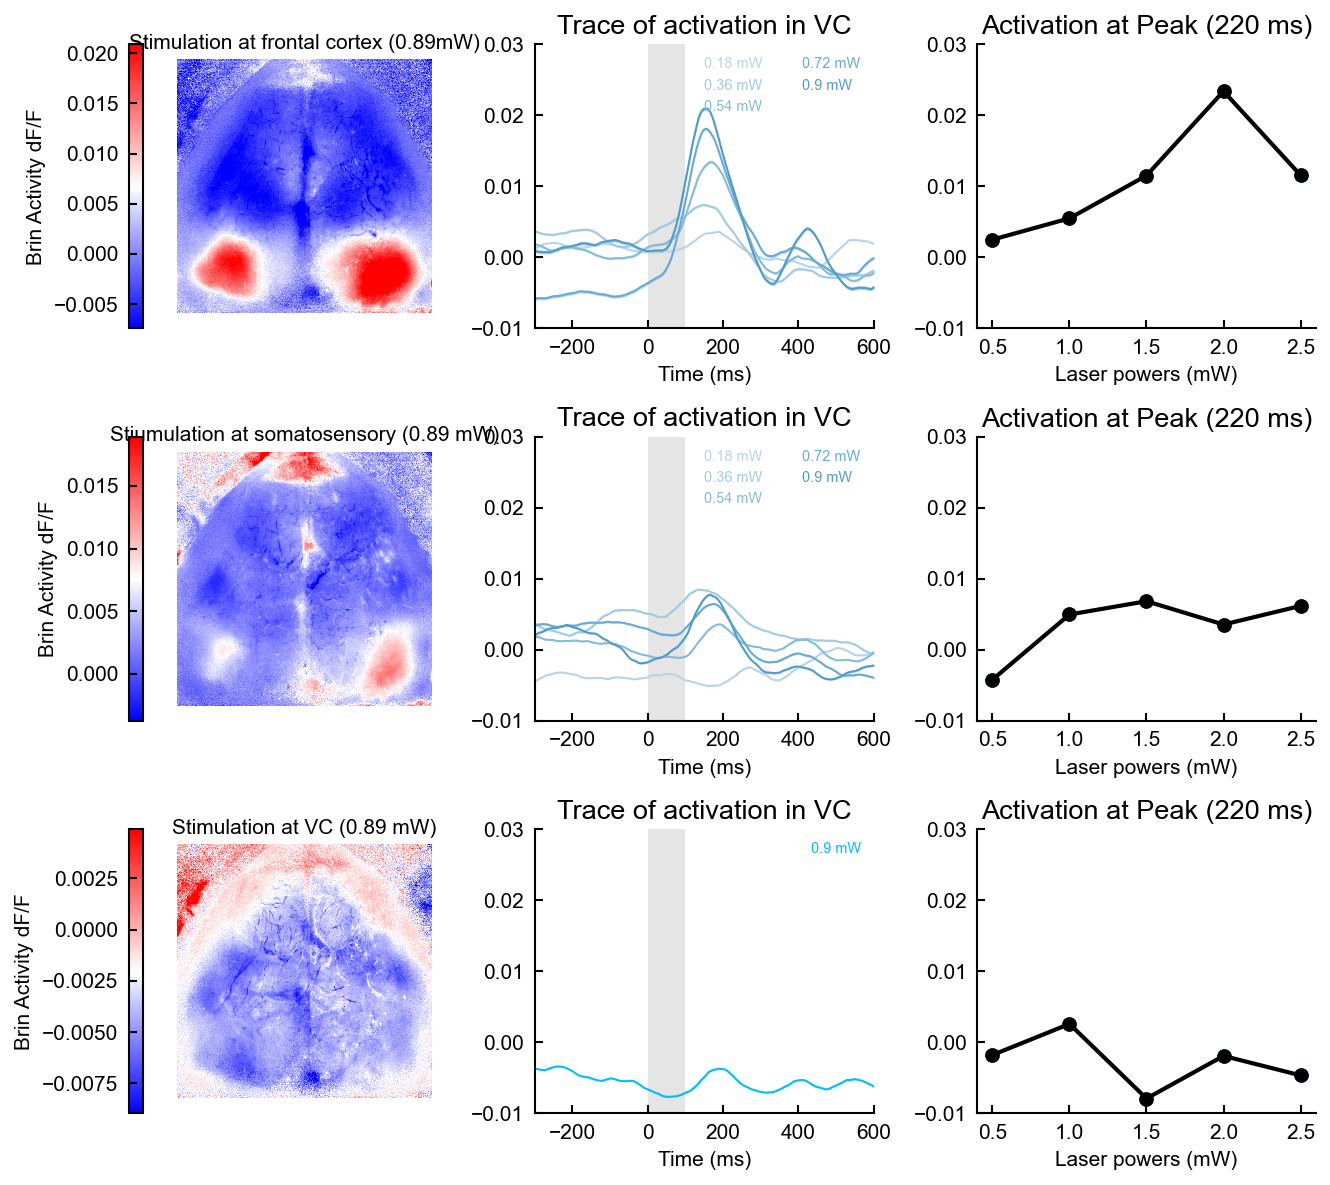

In [89]:
# figure plotting

f = plt.figure(figsize=(9,8))
gs=mpl.gridspec.GridSpec(3,3)

data=dataVis819
powers=np.unique(data.laserPowers)
frame=220
samps=650
quantYlim=[-0.01,0.03]
#frontal cortex
gX=0
gY=0
ax = plt.subplot(gs[0])
brainImg(ax,data=dataVis819,galvoX=gX,galvoY=gY,frame=frame,n_samples=samps,\
         power=2.5,title='Stimulation at frontal cortex (0.89mW)')

ax = plt.subplot(gs[1])
wfTrace(ax,data=dataVis819,galvoX=gX,galvoY=gY,\
        x=120,y=450,powers=powers,ylim=quantYlim,\
            title='Trace of activation in VC',ylabel=False)
ax = plt.subplot(gs[2])
respQuant(ax,data=dataVis819,galvoX=gX,galvoY=gY,x=120,n_samples=samps,\
          y=450,time=frame,ylim=quantYlim)

#somatosensory
gX=0
gY=2
ax = plt.subplot(gs[3])
brainImg(ax,data=dataVis819,galvoX=gX,galvoY=gY,frame=frame,n_samples=samps,\
         power=2.5,title='Stiumulation at somatosensory (0.89 mW)')

ax = plt.subplot(gs[4])
wfTrace(ax,data=dataVis819,galvoX=0,galvoY=gY,\
        x=120,y=450,powers=powers,ylim=quantYlim,\
            title='Trace of activation in VC',ylabel=False)
ax = plt.subplot(gs[5])
respQuant(ax,data=dataVis819,galvoX=gX,galvoY=gY,x=120,n_samples=samps,\
          y=450,time=frame,ylim=quantYlim)

#VC
gX=0
gY=4.5
ax = plt.subplot(gs[6])
brainImg(ax,data=dataVis819,galvoX=gX,galvoY=gY,frame=frame,n_samples=samps,\
        power=2.5,title='Stimulation at VC (0.89 mW)')

ax = plt.subplot(gs[7])
wfTrace(ax,data=dataVis819,galvoX=0,galvoY=gY,\
        x=120,y=450,powers=[2.5],ylim=quantYlim,\
            title='Trace of activation in VC',ylabel=False)
ax = plt.subplot(gs[8])
respQuant(ax,data=dataVis819,galvoX=gX,galvoY=gY,x=120,n_samples=samps,\
          time=frame,ylim=quantYlim)

f.tight_layout()


#### flicker/no flicker comparison

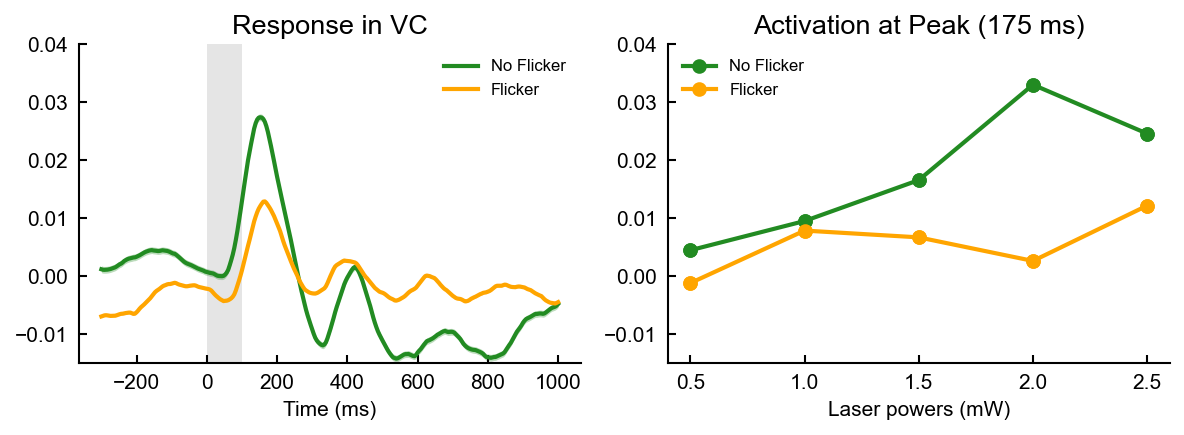

In [86]:
galvoX=0
galvoY=0
time=175
x=120
y=450 
f=plt.figure(figsize=(8,3))
gs=mpl.gridspec.GridSpec(1,2)

ax=plt.subplot(gs[0])
visRespCompare(ax,data=dataVis819,galvoX=galvoX,galvoY=galvoY,x=x,y=y,n_samples=300,ylim=[-0.015,0.040])

ax=plt.subplot(gs[1])
visRespQuantCompare(ax,data=dataVis819,time=time,galvoX=galvoX,galvoY=galvoY,x=x,y=y,n_samples=300,ylim=[-0.015,0.040])


### figure 3: quant

- there is temporal spread
- there is spatial spread
- spread and activation depends on power 
- it is consistent over months 

tbd:
- with flicker
- day-to-day

In [92]:
dataSt816=wfOpto(Path(r'Y:\Subjects\AL_0033\2024-08-16\1'))

In [102]:
dataOp425_AB32 = wfOpto(Path(r'Y:\Subjects\AB_0032\2024-04-25\1'))

In [103]:
dataOp622_AL33 = wfOpto(Path(r'Y:\Subjects\AL_0033\2024-06-22\1'))

In [116]:
dataOp820_AL34 = wfOpto(Path(r'Y:\Subjects\AL_0034\2024-08-20\1'))

In [100]:
def stimLensOverlay(ax,data,mouse='',day='',type='40Hz',power=1.7,start=-.3,end=4,n_samples=650,y=400,x=150,width=15,ylim=[-0.08,0.08],cols=2,anchor=(1,1)):
    '''
    response of activity to different durations of stimulus, all overlayed
    '''
    pxLens=[]
    lens = np.unique(data.pulseLengths).ravel()
    colors=plt.cm.Greens(np.linspace(0,1,lens.shape[0]))
    pws=np.argwhere(data.laserPowers==power).ravel()
    timestamps=np.linspace(start,end,n_samples)

    for iL, len in enumerate(lens):
        lenTrs = np.argwhere(data.pulseLengths == len).ravel()
        theseTrs=np.intersect1d(lenTrs,pws)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
        mov_mean_dff = videoROI/avg
        avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
        pxLens.append(avgOverRoi)
    
    lines = [plt.plot(timestamps, y, label=f'{lens[i]}s',color=colors[i])[0] for i, y in enumerate(pxLens)]

    for iP, power in enumerate(pxLens):
        # plt.plot(timestamps, power,linewidth=2,label=powers[iP],color=colors[iP])
        plt.fill_between(timestamps, \
                power-scipy.stats.sem(power,axis=0),\
                power+scipy.stats.sem(power,axis=0), color=colors[iP],label='_nolegend_',alpha=.5,linewidth=0)
    legend = plt.legend(ncols=cols,loc='upper right',bbox_to_anchor=anchor,fontsize='x-small',\
                        columnspacing=0.5,handletextpad=0.3)

    # Change the color of the text in the legend to match the line colors
    for text, line in zip(legend.get_texts(), lines):
        text.set_color(line.get_color())
    # Optionally, remove the lines and markers from the legend
    for legend_line in legend.get_lines():
        legend_line.set_linewidth(0)
    for legend_marker in legend.get_patches():
        legend_marker.set_visible(False)

    plt.title(f'Length of Stimulus Effect on Inactivation',fontsize=13)
    plt.xlabel('Time (ms)',fontsize=7)
    plt.ylabel('Brain Activity (df/f)',fontsize=7)
    plt.ylim(ylim)
    f.tight_layout()

In [96]:
def inacTime(ax,data,mouse='',day='',pows=[1.5,1.7],n_samples=650,y=400,x=170,width=15):
    '''
    quantification of how long activity is below 0 for diff stim lens
    '''
    lens = np.unique(data.pulseLengths).ravel()
    numlens = lens.shape[0]
    pxLens = np.zeros((2,numlens),dtype=float)
    for iP,pow in enumerate(pows):
        pws=np.argwhere(data.laserPowers==pow).ravel()
        for iL, len in enumerate(lens):
            lenTrs = np.argwhere(data.pulseLengths == len).ravel()
            theseTrs=np.intersect1d(lenTrs,pws)
            onTimes = data.laserOn[theseTrs]
            trs = [np.linspace(-.3+on, 4+on, n_samples) for on in onTimes]
            trs = np.squeeze(np.array(trs))
            
            wf = np.mean(data.tToWFManual(trs),axis=0)
            mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
            mov = mov.reshape(560,560,-1)
            meanimg = data.meanImage.reshape(560,560,-1)
            avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
            videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
            mov_mean_dff = videoROI/avg
            peak = np.min(mov_mean_dff)
            halfpeak=peak/2
            tf = [i<halfpeak for i in mov_mean_dff]
            deac = mov_mean_dff[tf]
            pxLens[iP,iL] = deac.shape[0]*(1/1000)
    colors=['blue','orange']
    for i in range(2):
        plt.plot(lens,pxLens[i,:],'-o',lw=2,color=colors[i])
        plt.errorbar(lens,pxLens[i,:],yerr=.01,color=colors[i],label='_nolegend_')
        plt.scatter(lens,pxLens[i,:],color=colors[i],label='_nolegend_')
    pwscorrected = [round(i/2.777777778,2) for i in pows]
    plt.legend(pwscorrected)
    plt.xlabel("Length of stimulus",fontsize=7)
    plt.ylabel("Time inactivated (s)",fontsize=7)
    plt.title(f'Time brain remains inactivated {mouse} {day}',fontsize=13)

In [48]:
def spatialResX(ax):
    '''
    spatial resolution
    how to do this? along lines or do an ROI?
    '''
    spreadByPower = []
    spatial = dataOp.svdSpatFull.reshape(560*560, -1)
    for count,power in enumerate(np.unique(dataOp.laserPowers)):
        trials = np.squeeze(np.argwhere(dataOp.laserPowers==power)) # find trials
        time = [np.linspace(i+0.09, i+0.1, 100) for i in dataOp.laserOn[trials]] # find times for trials. length 50 bc 50 trials --> each have 100 times 

        activity = dataOp.tToWFManual(time) # 50x100x500. 50 trials, 100 times each, 500 components
        
        activity = np.mean(activity, axis=0) # 100x500. activity averaged across trials. 100 times, 500 compoennets, all an average of all trials
        
        dwf = [np.diff(i, prepend=i[0]) for i in activity] #100x500, just a correction
        dwf = np.array(dwf)
        avg = np.mean(dwf, axis=1)
        
        videoAvg = spatial @ dwf.T
        videoAvg = videoAvg.reshape(560,560,-1) #560x560x100 pixelsxtime
        # videoAvg = np.mean(videoAvg, axis=2) # deleted bc averaging over time causes issues, since stim is on/off
        videoAvg = videoAvg[:,:,0] # 560x560. picking one time point. 
        videoROI = videoAvg[250, :] # 560 horizontal pixels. taken from avg activity, the average activity for all trials and all times accross one line 
        
        spreadByPower.append(videoROI)
    spreadByPower = np.array(spreadByPower)

    for count,power in enumerate(np.unique(dataOp.laserPowers)):
        data = spreadByPower[count]
        data = gaussian_filter1d(data, sigma=2)
        plt.plot(data,c='k') 
    # plt.title("Spatial spread over horizontal line")
    plt.xlabel("location 560:560")
    plt.ylabel("activity")

    plt.title('spatial resolution')


Text(0.5, 1.0, 'spatial resolution stim (0, 0)')

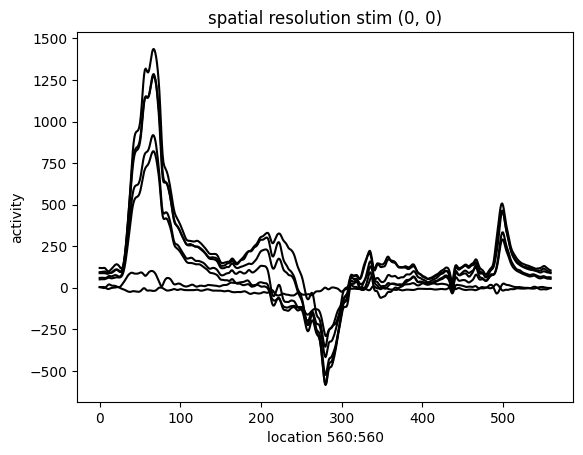

In [57]:
#spread op3
spreadByPower = []
spatial = dataOp.svdSpatFull.reshape(560*560, -1)

galvoX_val=0
galvoY_val=0
galvoX=np.argwhere(dataOp3.galvoX==-galvoX_val).ravel()
galvoY=np.argwhere(dataOp3.galvoY==galvoY_val).ravel()

px = np.intersect1d(galvoY,galvoX)
for count,power in enumerate(np.unique(dataOp3.laserPowers)):
    pows = np.squeeze(np.argwhere(dataOp3.laserPowers==power)) # find trials
    trials = np.intersect1d(pows,px)
    time = [np.linspace(i+0.09, i+0.1, 100) for i in dataOp3.laserOn[trials]] # find times for trials. length 50 bc 50 trials --> each have 100 times 

    activity = dataOp3.tToWFManual(time) # 50x100x500. 50 trials, 100 times each, 500 components
    
    activity = np.mean(activity, axis=0) # 100x500. activity averaged across trials. 100 times, 500 compoennets, all an average of all trials
    
    dwf = [np.diff(i, prepend=i[0]) for i in activity] #100x500, just a correction
    dwf = np.array(dwf)
    avg = np.mean(dwf, axis=1)
    
    videoAvg = spatial @ dwf.T
    videoAvg = videoAvg.reshape(560,560,-1) #560x560x100 pixelsxtime
    # videoAvg = np.mean(videoAvg, axis=2) # deleted bc averaging over time causes issues, since stim is on/off
    videoAvg = videoAvg[:,:,0] # 560x560. picking one time point. 
    videoROI = videoAvg[150, :] # 560 horizontal pixels. taken from avg activity, the average activity for all trials and all times accross one line 
    
    spreadByPower.append(videoROI)
spreadByPower = np.array(spreadByPower)

for count,power in enumerate(np.unique(dataOp3.laserPowers)):
    data = spreadByPower[count]
    data = gaussian_filter1d(data, sigma=2)
    plt.plot(data,c='k') 
# plt.title("Spatial spread over horizontal line")
plt.xlabel("location 560:560")
plt.ylabel("activity")

plt.title(f'spatial resolution stim {galvoX_val,galvoY_val}')

Text(0.5, 1.0, 'spatial resolution stim (3.3, 3.3)')

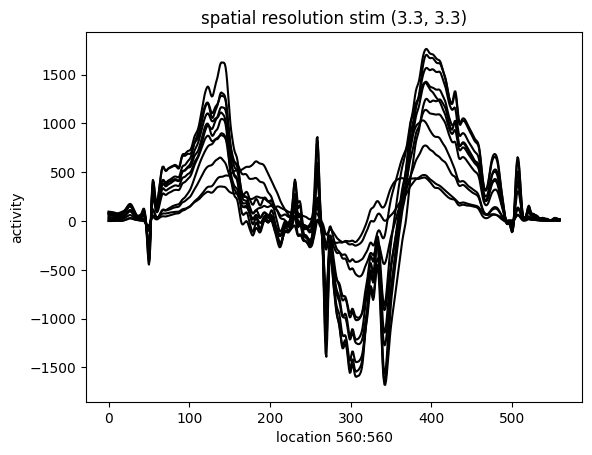

In [61]:
#spread op4
spreadByPower = []
spatial = dataOp4.svdSpatFull.reshape(560*560, -1)

galvoX_val=3.3
galvoY_val=3.3
galvoX=np.argwhere(dataOp4.galvoX==galvoX_val).ravel()
galvoY=np.argwhere(dataOp4.galvoY==galvoY_val).ravel()

px = np.intersect1d(galvoY,galvoX)

for count,power in enumerate(np.unique(dataOp4.laserPowers)):
    pows = np.squeeze(np.argwhere(dataOp4.laserPowers==power)) # find trials
    trials=np.intersect1d(px,pows)
    time = [np.linspace(i+0.09, i+0.1, 100) for i in dataOp4.laserOn[trials]] # find times for trials. length 50 bc 50 trials --> each have 100 times 

    activity = dataOp4.tToWFManual(time) # 50x100x500. 50 trials, 100 times each, 500 components
    
    activity = np.mean(activity, axis=0) # 100x500. activity averaged across trials. 100 times, 500 compoennets, all an average of all trials
    
    dwf = [np.diff(i, prepend=i[0]) for i in activity] #100x500, just a correction
    dwf = np.array(dwf)
    avg = np.mean(dwf, axis=1)
    
    videoAvg = spatial @ dwf.T
    videoAvg = videoAvg.reshape(560,560,-1) #560x560x100 pixelsxtime
    # videoAvg = np.mean(videoAvg, axis=2) # deleted bc averaging over time causes issues, since stim is on/off
    videoAvg = videoAvg[:,:,0] # 560x560. picking one time point. 
    videoROI = videoAvg[130, :] # 560 horizontal pixels. taken from avg activity, the average activity for all trials and all times accross one line 
    
    spreadByPower.append(videoROI)
spreadByPower = np.array(spreadByPower)

for count,power in enumerate(np.unique(dataOp4.laserPowers)):
    data = spreadByPower[count]
    data = gaussian_filter1d(data, sigma=2)
    plt.plot(data,c='k') 
# plt.title("Spatial spread over horizontal line")
plt.xlabel("location 560:560")
plt.ylabel("activity")

plt.title(f'spatial resolution stim {galvoX_val,galvoY_val}')

In [286]:
def xQuant(ax):
    '''
    quantifying spatial resolution. also half-width?
    '''
    spreadByPower = []
    spatial = dataOp.svdSpatFull.reshape(560*560, -1)
    for count,power in enumerate(np.unique(dataOp.laserPowers)):
        trials = np.squeeze(np.argwhere(dataOp.laserPowers==power)) # find trials
        time = [np.linspace(i+0.09, i+0.1, 100) for i in dataOp.laserOn[trials]] # find times for trials. length 50 bc 50 trials --> each have 100 times 

        activity = dataOp.tToWFManual(time) # 50x100x500. 50 trials, 100 times each, 500 components
        
        activity = np.mean(activity, axis=0) # 100x500. activity averaged across trials. 100 times, 500 compoennets, all an average of all trials
        
        dwf = [np.diff(i, prepend=i[0]) for i in activity] #100x500, just a correction
        dwf = np.array(dwf)
        avg = np.mean(dwf, axis=1)
        
        videoAvg = spatial @ dwf.T
        videoAvg = videoAvg.reshape(560,560,-1) #560x560x100 pixelsxtime
        # videoAvg = np.mean(videoAvg, axis=2) # deleted bc averaging over time causes issues, since stim is on/off
        videoAvg = videoAvg[:,:,0] # 560x560. picking one time point. 
        videoROI = videoAvg[230:270, :] # 560 horizontal pixels. taken from avg activity, the average activity for all trials and all times accross one line 
        videoROI = np.mean(videoAvg,axis=(0))
        
        spreadByPower.append(videoROI)
    spreadByPower = np.array(spreadByPower)

    half_widths=[]
    for power in spreadByPower:
        peaks,properties=scipy.signal.find_peaks(power,height=[None,None],width=[None,None],distance=100)
        widths = scipy.signal.peak_widths(power,peaks)
        half_widths.append(widths[0][0])
    plt.plot(half_widths,color='k',linewidth=1.5)
    plt.title('Half Widths - Space',fontsize=10)
    plt.xlabel('Powers',fontsize=7)
    plt.ylabel('Peak Width',fontsize=7)


In [105]:
def powerQuantReturn(data,galvoX=0,galvoY=0,x=150,y=380,n_samples=300,time=90,width=15):
    '''
    for returning the quantification into one variable
    '''
    powers = np.unique(data.laserPowers)
    pxPowers = []
    timestamps = np.linspace(-0.3, 1, n_samples)*1000

    galvoXTrs=np.argwhere(data.galvoX[tr1:tr2]==galvoX).ravel()
    galvoYTrs=np.argwhere(data.galvoY[tr1:tr2]==galvoY).ravel()
    loc=np.intersect1d(galvoXTrs,galvoYTrs)

    pixel_ix = np.ravel_multi_index((y, x), (data.py, data.px))
    for iP, power in enumerate(powers):
        pwTrs = np.argwhere(data.laserPowers[tr1:tr2] == power).ravel()
        theseTrs=np.intersect1d(pwTrs,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
        trs = np.squeeze(np.array(trs))
        
        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        mov = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560,560,-1)
        avg = meanimg[(y-width):(y+width),(x-width):(x+width)]
        videoROI = mov[(y-width):(y+width),(x-width):(x+width)] # ROI vid with average activity
        mov_mean_dff = videoROI/avg
        avgOverRoi=np.mean(mov_mean_dff,axis=(0,1))
        pxPowers.append(avgOverRoi)

    pixelInterp = scipy.interpolate.interp1d(timestamps, pxPowers, axis=1, fill_value='extrapolate')

    timeX = pixelInterp(time)

    return(timeX)

#### panels

##### temp and spat

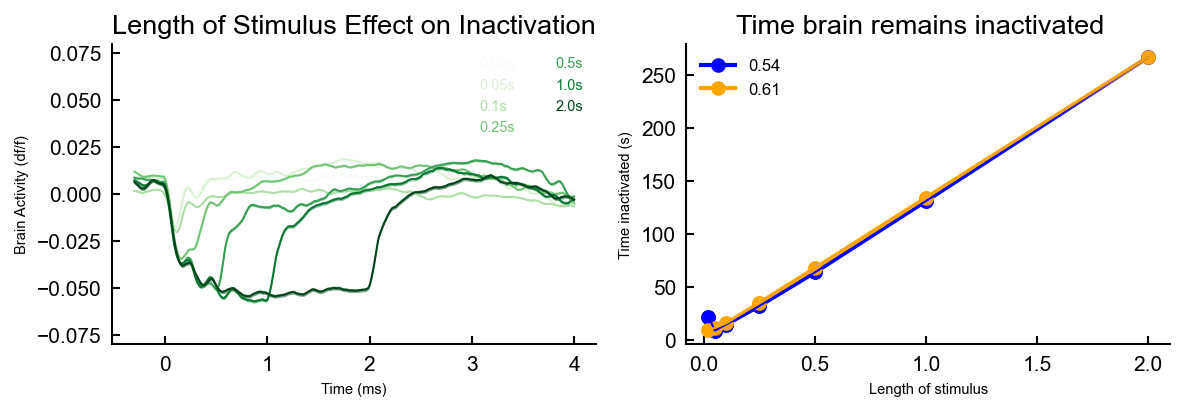

In [101]:
f = plt.figure(figsize=(8,5))
gs=mpl.gridspec.GridSpec(2,2)

ax = plt.subplot(gs[0])
stimLensOverlay(ax,data=dataSt816)

ax=plt.subplot(gs[1])
inacTime(ax,data=dataSt816)

# ax = plt.subplot(gs[2])
# spatialResX(ax) #spatial resolution 

# ax = plt.subplot(gs[3])
# xQuant(ax) #quantify spatial resolution
f.tight_layout()

##### over days

In [ ]:
quant622=powerQuantReturn(data=dataOp622_AL33,y=350,x=170,galvoX=0,galvoY=3)
quant709=powerQuantReturn(data=dataOp709_AL33,y=350,x=170,galvoX=0,galvoY=2)
quant712=powerQuantReturn(data=dataOp712_AL33,y=350,x=170,galvoX=0,galvoY=2)
quant718=powerQuantReturn(data=dataOp718_AL33,y=350,x=170,galvoX=0,galvoY=2)
days=[quant622,quant709,quant712,quant718]

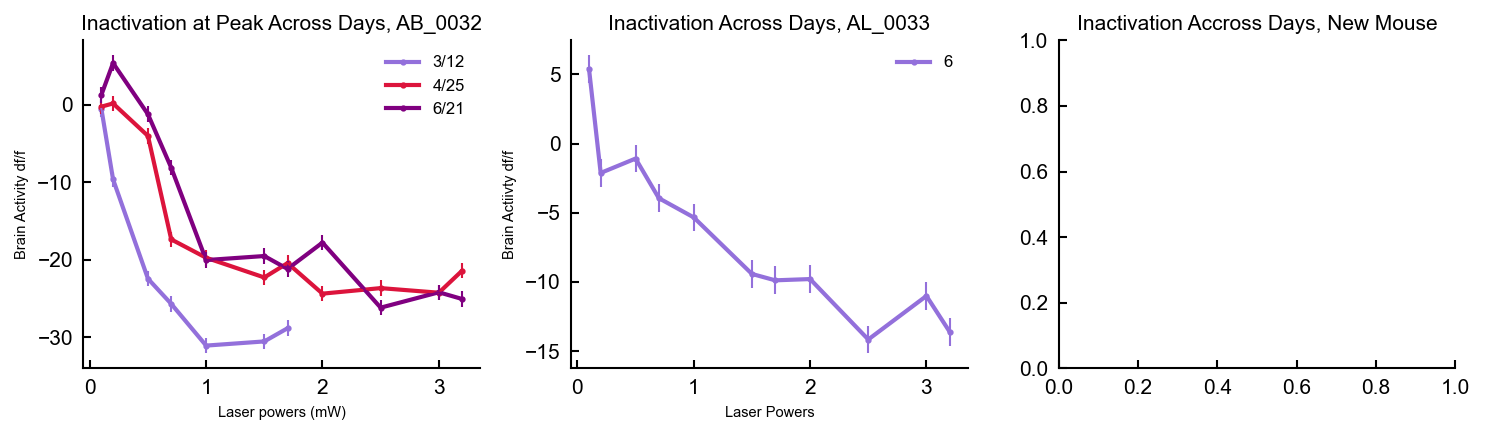

In [44]:
mouse='AL33'
f = plt.figure(figsize=(4/1.5, 3/1.5), dpi=300)
powers=np.unique(dataOp709_AL33.laserPowers)
colors=plt.cm.Blues(np.linspace(0.5,1,4))
labels=['6/22','7/08', '7/12','7/19']
for i,day in enumerate(days):
    plt.plot(powers[0:day.shape[0]],day,'-o',c=colors[i],lw=1,markersize=2)

    plt.errorbar(powers[0:day.shape[0]],day,yerr=0.01,c=colors[i],label='_nolegend_')

    plt.scatter(powers[0:day.shape[0]],day,label='_nolegend_',s=.5)

plt.legend(labels,loc='upper right',fontsize=5)
plt.xlabel("Laser powers (mW)",fontsize=7)
plt.ylabel('Brain Activity df/f',fontsize=7)
plt.title(f"Inactivation at Peak Across Days mouse {mouse}",fontsize=8)

##### over preps

In [117]:
quantAB32=powerQuantReturn(data=dataOp425_AB32,galvoX=0,galvoY=3.3)
quantAL33=powerQuantReturn(data=dataOp622_AL33,galvoX=0,galvoY=3)
quantAL34=powerQuantReturn(data=dataOp820_AL34,galvoX=0,galvoY=3)
mice=[quantAL33,quantAL34,quantAB32]

Text(0.5, 1.0, 'Inactivation at Peak Across Preps')

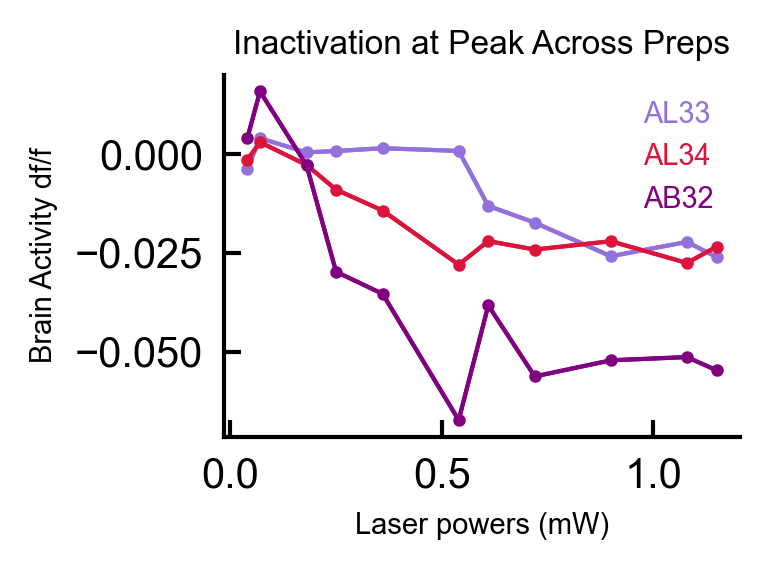

In [120]:
f = plt.figure(figsize=(4/1.5, 3/1.5), dpi=300)
powers=np.unique(dataOp425_AB32.laserPowers)
powers = [round(i/2.777777778,2) for i in powers]
colors=['mediumpurple', 'crimson', 'purple','mediumvioletred','hotpink']
labels=['AL33','AL34','AB32']

lines = [plt.plot(powers, y, label=f'{labels[i]}',color=colors[i])[0] for i, y in enumerate(mice)]

for i,mouse in enumerate(mice):
    plt.plot(powers[0:len(mouse)],mouse,'-o',c=colors[i],lw=1,markersize=2)

    plt.scatter(powers[0:len(mouse)],mouse,label='_nolegend_',c=colors[i],s=.5)
    
cols=1
anchor=(1,1)
legend = plt.legend(ncols=cols,loc='upper right',bbox_to_anchor=anchor,fontsize='x-small',\
                        columnspacing=0.5,handletextpad=0.3)

# Change the color of the text in the legend to match the line colors
for text, line in zip(legend.get_texts(), lines):
    text.set_color(line.get_color())
# Optionally, remove the lines and markers from the legend
for legend_line in legend.get_lines():
    legend_line.set_linewidth(0)
for legend_marker in legend.get_patches():
    legend_marker.set_visible(False)

plt.xlabel("Laser powers (mW)",fontsize=7)
plt.ylabel("Brain Activity df/f",fontsize=7)
plt.title("Inactivation at Peak Across Preps",fontsize=8)

#### Spatial Options

In [49]:
def spatialResY(ax):
    spreadByPower = []
    spatial = dataOp.svdSpatFull.reshape(560*560, -1)
    for count,power in enumerate(np.unique(dataOp.laserPowers)):
        trials = np.squeeze(np.argwhere(dataOp.laserPowers==power))
        time = [np.linspace(i+0.09, i+0.1, 100) for i in dataOp.laserOn[trials]]
        activity = dataOp.tToWFManual(time)
        activity = np.mean(activity, axis=0)
        
        dwf = [np.diff(i, prepend=i[0]) for i in activity]
        dwf = np.array(dwf)
            
        videoAvg = spatial @ dwf.T
        videoAvg = videoAvg.reshape(560,560,-1)
        # videoAvg = np.mean(videoAvg, axis=2)
        videoAvg = videoAvg[:,:,0]
        videoROI = videoAvg[:, 200] # activity across one line
        
        spreadByPower.append(videoROI)
    spreadByPower = np.array(spreadByPower)
    for count,power in enumerate(np.unique(dataOp.laserPowers)):
        data = spreadByPower[count]
        data = gaussian_filter1d(data, sigma=3)
        plt.plot(data,np.linspace(0,560,560),c='k')  
    plt.title("Spatial spread over vertical line")
    plt.xlabel("activity")
    plt.ylabel("location 560:560")


In [50]:
def yQuant(ax):
    spreadByPower = []
    spatial = dataOp.svdSpatFull.reshape(560*560, -1)
    for count,power in enumerate(np.unique(dataOp.laserPowers)):
        trials = np.squeeze(np.argwhere(dataOp.laserPowers==power))
        time = [np.linspace(i+0.09, i+0.1, 100) for i in dataOp.laserOn[trials]]
        activity = dataOp.tToWFManual(time)
        activity = np.mean(activity, axis=0)
        
        dwf = [np.diff(i, prepend=i[0]) for i in activity]
        dwf = np.array(dwf)
            
        videoAvg = spatial @ dwf.T
        videoAvg = videoAvg.reshape(560,560,-1)
        # videoAvg = np.mean(videoAvg, axis=2)
        videoAvg = videoAvg[:,:,0]
        videoROI = videoAvg[:, 200] # activity across one line
        
        spreadByPower.append(videoROI)
    spreadByPower = np.array(spreadByPower)
    half_widths=[]
    for power in spreadByPower:
        peaks,properties=scipy.signal.find_peaks(power,height=[None,None],width=[None,None],distance=100)
        widths = scipy.signal.peak_widths(power,peaks)
        half_widths.append(widths[0][0])
    plt.plot(half_widths,color='k',linewidth=1.5)
    plt.title('Half Widths - Space',fontsize=10)
    plt.xlabel('Powers',fontsize=7)
    plt.ylabel('Peak Width',fontsize=7)

In [51]:
def squareRes(ax,x1,x2,y1,y2):
    for count,power in enumerate(np.unique(dataOp.laserPowers)):
        trials = np.squeeze(np.argwhere(dataOp.laserPowers==power))
        time = [np.linspace(i+0.07, i+0.1, 100) for i in dataOp.laserOn[trials]]
        activity = dataOp.tToWFManual(time)
        activity = np.mean(activity, axis=0)

        dwf = [np.diff(i, prepend=i[0]) for i in activity]
        dwf = np.array(dwf)

        videoAvg = spatial @ dwf.T
        videoAvg = videoAvg.reshape(560,560,-1)
        videoAvg = np.mean(videoAvg, axis=2)
    plt.imshow(videoAvg, cmap='bwr',clim = np.percentile(videoAvg, (2, 99.9)))
    rect = Rectangle((x1,y1),width=(x2-x1),height=(y2-y1),edgecolor='orange',facecolor='none',lw=4)
    ax.add_patch(rect)
    rect.set_edgecolor('orange')

In [52]:
def squareQuant(ax,x1,x2,y1,y2):
    spreadByPower=[]
    for count,power in enumerate(np.unique(dataOp.laserPowers)):
        trials = np.squeeze(np.argwhere(dataOp.laserPowers==power))
        time = [np.linspace(i+0.07, i+0.1, 100) for i in dataOp.laserOn[trials]]
        activity = dataOp.tToWFManual(time)
        activity = np.mean(activity, axis=0)

        dwf = [np.diff(i, prepend=i[0]) for i in activity]
        dwf = np.array(dwf)

        videoAvg = spatial @ dwf.T
        videoAvg = videoAvg.reshape(560,560,-1)
        videoROI = videoAvg[y1:y2, x1:x2] # ROI vid with average activity

        videoROI = videoROI.flatten()
        activities = [x for x in videoROI if x <= -75]
        
        spreadByPower.append(len(activities)/((x2-x1)*(y2-y1)))
    powers = np.unique(dataOp.laserPowers)
    plt.plot(powers,spreadByPower,color='darkslateblue')
    # plt.fill_between(spreadByPower[0], \
    #                  np.mean(spreadByPower, axis=0)-scipy.stats.sem(spreadByPower,axis=0),\
    #                  np.mean(spreadByPower,axis=0)+scipy.stats.sem(spreadByPower,axis=0), color='lavender')
    plt.xlabel("power")
    plt.ylabel("percentage spread")
    plt.title(f'Percentage spatial spread')

Text(0.5, 1.0, 'Percentage spatial spread')

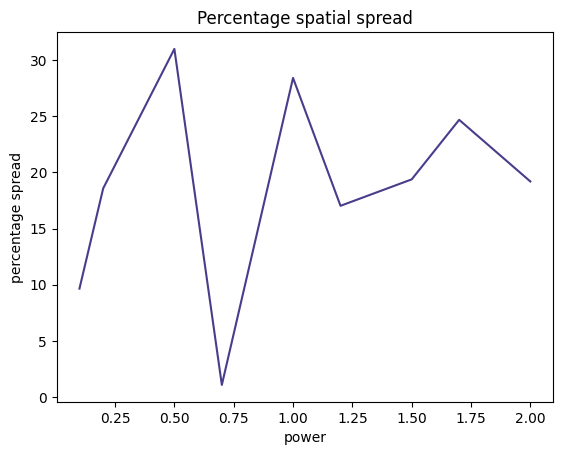

In [56]:
x1=120
x2=280
y1=120
y2=280
spreadByPower=[]
for count,power in enumerate(np.unique(dataOp.laserPowers)):
    trials = np.squeeze(np.argwhere(dataOp.laserPowers==power))
    time = [np.linspace(i+0.07, i+0.1, 100) for i in dataOp.laserOn[trials]]
    activity = dataOp.tToWFManual(time)
    activity = np.mean(activity, axis=0)

    dwf = [np.diff(i, prepend=i[0]) for i in activity]
    dwf = np.array(dwf)

    videoAvg = spatial @ dwf.T
    videoAvg = videoAvg.reshape(560,560,-1)
    videoROI = videoAvg[x1:x2, y1:y2] # ROI vid with average activity

    videoROI = videoROI.flatten()
    activities = [x for x in videoROI if x <= -75]
    
    spreadByPower.append(len(activities)/((x2-x1)*(y2-y1)))
powers = np.unique(dataOp.laserPowers)
plt.plot(powers,spreadByPower,color='darkslateblue')
# plt.fill_between(spreadByPower[0], \
#                  np.mean(spreadByPower, axis=0)-scipy.stats.sem(spreadByPower,axis=0),\
#                  np.mean(spreadByPower,axis=0)+scipy.stats.sem(spreadByPower,axis=0), color='lavender')
plt.xlabel("power")
plt.ylabel("percentage spread")
plt.title(f'Percentage spatial spread')

##### panels

NameError: name 'spatialResX' is not defined

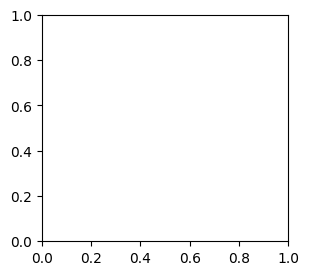

In [53]:
f = plt.figure(figsize=(7,10))
gs=mpl.gridspec.GridSpec(3,2)

ax = plt.subplot(gs[0])
spatialResX(ax)

ax = plt.subplot(gs[1])
xQuant(ax)

ax = plt.subplot(gs[2])
spatialResY(ax)

ax = plt.subplot(gs[3])
yQuant(ax)

x1=120
x2=280
y1=120
y2=280
ax = plt.subplot(gs[4])
squareRes(ax,x1,x2,y1,y2)

ax = plt.subplot(gs[5])
squareQuant(ax,x1,x2,y1,y2)

f.tight_layout()

### figure 4: contralateral

- activity in the left doesnt predict the right and vice versa

In [69]:
def contralatTraces(ax,data,galvoX=0,galvoY=0,power=2,n_samples=650,legend=False):
    timestamps=np.linspace(-.3,1,n_samples)*1000
    power = np.argwhere(data.laserPowers==power).ravel() 
    galvoXTrs=np.argwhere(data.galvoX==galvoX).ravel() #change for loc stim
    galvoYTrs=np.argwhere(data.galvoY==galvoY).ravel() #change for loc stim

    #all the pixels we might need
    pixel_RightPost=np.ravel_multi_index((390,400),(data.py, data.px))
    pixel_LeftPost = np.ravel_multi_index((400,200),(data.py,data.px))
    pixel_LeftAnt=np.ravel_multi_index((120,190),(data.py, data.px))
    pixel_RightAnt=np.ravel_multi_index((120,310),(data.py, data.px))

    #find trials
    px = np.intersect1d(galvoYTrs,galvoXTrs)
    theseTrs=np.intersect1d(px,power)
    onTimes=data.laserOn[theseTrs]
    trs=[np.linspace(-.3+on,1+on,n_samples) for on in onTimes]
    trs=np.squeeze(np.array(trs))

    thisPowerLP=[]
    thisPowerRP=[]
    thisPowerLA=[]
    thisPowerRA=[]
    #finding movies for those trials in those locations
    for iT, tr in enumerate(trs):
        wf=data.tToWf(tr)
        dwf=[np.diff(i,prepend=i[0]) for i in wf.T]
        dwf=np.array(dwf)

        #find traces for each pixel

        #posterior
        movRightP=data.svdSpat[pixel_RightPost]@dwf
        thisPowerRP.append(movRightP)
        movLeftP=data.svdSpat[pixel_LeftPost]@dwf
        thisPowerLP.append(movLeftP)

        #anterior
        movRightA=data.svdSpat[pixel_RightAnt]@dwf
        thisPowerRA.append(movRightA)
        movLeftA=data.svdSpat[pixel_LeftAnt]@dwf
        thisPowerLA.append(movLeftA)

    thisPowerLP=np.array(thisPowerLP)
    thisPowerRP=np.array(thisPowerRP)
    thisPowerLA=np.array(thisPowerLA)
    thisPowerRA=np.array(thisPowerRA)

    plt.plot(timestamps,np.mean(thisPowerLP,axis=0),color='darkviolet',label='Left Post')
    plt.plot(timestamps,np.mean(thisPowerRP,axis=0),color='violet',label='Right Post')
    plt.plot(timestamps,np.mean(thisPowerLA,axis=0),color='blue',label='Left Ant')
    plt.plot(timestamps,np.mean(thisPowerRA,axis=0),color='deepskyblue',label='Right Ant')
    if legend:
        plt.legend(bbox_to_anchor=(1,1),loc='upper left')
    pw=power/2.77778
    plt.title(f'Stimulating Posterior Right 0.72 mW')
    plt.xlabel('time (ms)')
    plt.ylabel('$\Delta F$')
    plt.axvspan(0,100,color='gray',alpha=.3,lw=0,label='_nolegend_')
    plt.ylim([-50,50])

In [68]:
2/2.77778

0.7199994240004608

In [327]:
def stimRight(ax):
    power = 2
    n_samples=650
    timestamps=np.linspace(-.3,1,n_samples)*1000
    power = np.argwhere(dataOp2.laserPowers==power).ravel()
    galvoX=np.argwhere(dataOp2.galvoX==3.3).ravel()
    galvoY=np.argwhere(dataOp2.galvoY==0).ravel()

    px = np.intersect1d(power,galvoX)
    theseTrs=np.intersect1d(px,galvoY)

    pixel_Right=np.ravel_multi_index((200,410),(dataOp2.py, dataOp2.px))
    pixel_Left = np.ravel_multi_index((200,160),(dataOp2.py,dataOp2.px))
    onTimes=dataOp2.laserOn[theseTrs]
    trs=[np.linspace(-.3+on,1+on,n_samples) for on in onTimes]
    trs=np.squeeze(np.array(trs))

    thisPowerLeft=[]
    thisPowerRight=[]
    for iT, tr in enumerate(trs):
        wf=dataOp.tToWf(tr)
        dwf=[np.diff(i,prepend=i[0]) for i in wf.T]
        dwf=np.array(dwf)
        
        movRight=dataOp.svdSpat[pixel_Right]@dwf
        thisPowerRight.append(movRight)
        movLeft=dataOp.svdSpat[pixel_Left]@dwf
        thisPowerLeft.append(movLeft)

    thisPowerLeft=np.array(thisPowerLeft)
    thisPowerRight=np.array(thisPowerRight)
    plt.plot(timestamps,np.mean(thisPowerLeft,axis=0),color='green',label='Left')
    plt.plot(timestamps,np.mean(thisPowerRight,axis=0),color='orange',label='Right')
    plt.legend()
    plt.title('Stimulating Upper Right 2')
    plt.xlabel('time (ms)')
    plt.ylabel('$\Delta F$')

In [328]:
def stimLowerLeft(ax):
    power = 2
    n_samples=650
    timestamps=np.linspace(-.3,1,n_samples)*1000
    power = np.argwhere(dataOp2.laserPowers==power).ravel()
    galvoX=np.argwhere(dataOp2.galvoX==0).ravel()
    galvoY=np.argwhere(dataOp2.galvoY==3.3).ravel()

    px = np.intersect1d(power,galvoX)
    theseTrs=np.intersect1d(px,galvoY)

    pixel_Right=np.ravel_multi_index((430,410),(dataOp2.py, dataOp2.px))
    pixel_Left = np.ravel_multi_index((430,160),(dataOp2.py,dataOp2.px))
    onTimes=dataOp2.laserOn[theseTrs]
    trs=[np.linspace(-.3+on,1+on,n_samples) for on in onTimes]
    trs=np.squeeze(np.array(trs))

    thisPowerLeft=[]
    thisPowerRight=[]
    for iT, tr in enumerate(trs):
        wf=dataOp.tToWf(tr)
        dwf=[np.diff(i,prepend=i[0]) for i in wf.T]
        dwf=np.array(dwf)
        
        movRight=dataOp.svdSpat[pixel_Right]@dwf
        thisPowerRight.append(movRight)
        movLeft=dataOp.svdSpat[pixel_Left]@dwf
        thisPowerLeft.append(movLeft)

    thisPowerLeft=np.array(thisPowerLeft)
    thisPowerRight=np.array(thisPowerRight)
    plt.plot(timestamps,np.mean(thisPowerLeft,axis=0),color='green',label='Left')
    plt.plot(timestamps,np.mean(thisPowerRight,axis=0),color='orange',label='Right')
    plt.legend()
    plt.title('Stimulating Lower Left Power 2')
    plt.xlabel('time (ms)')
    plt.ylabel('$\Delta F$')

In [329]:
def stimLowerRight(ax):
    power = 2
    n_samples=650
    timestamps=np.linspace(-.3,1,n_samples)*1000
    power = np.argwhere(dataOp2.laserPowers==power).ravel()
    galvoX=np.argwhere(dataOp2.galvoX==3.3).ravel()
    galvoY=np.argwhere(dataOp2.galvoY==3.3).ravel()

    px = np.intersect1d(power,galvoX)
    theseTrs=np.intersect1d(px,galvoY)

    pixel_Right=np.ravel_multi_index((430,410),(dataOp2.py, dataOp2.px))
    pixel_Left = np.ravel_multi_index((430,160),(dataOp2.py,dataOp2.px))
    onTimes=dataOp2.laserOn[theseTrs]
    trs=[np.linspace(-.3+on,1+on,n_samples) for on in onTimes]
    trs=np.squeeze(np.array(trs))

    thisPowerLeft=[]
    thisPowerRight=[]
    for iT, tr in enumerate(trs):
        wf=dataOp.tToWf(tr)
        dwf=[np.diff(i,prepend=i[0]) for i in wf.T]
        dwf=np.array(dwf)
        
        movRight=dataOp.svdSpat[pixel_Right]@dwf
        thisPowerRight.append(movRight)
        movLeft=dataOp.svdSpat[pixel_Left]@dwf
        thisPowerLeft.append(movLeft)

    thisPowerLeft=np.array(thisPowerLeft)
    thisPowerRight=np.array(thisPowerRight)
    plt.plot(timestamps,np.mean(thisPowerLeft,axis=0),color='green',label='Left')
    plt.plot(timestamps,np.mean(thisPowerRight,axis=0),color='orange',label='Right')
    plt.legend()
    plt.title('Stimulating Lower Right Power 2')
    plt.xlabel('time (ms)')
    plt.ylabel('$\Delta F$')

#### panels

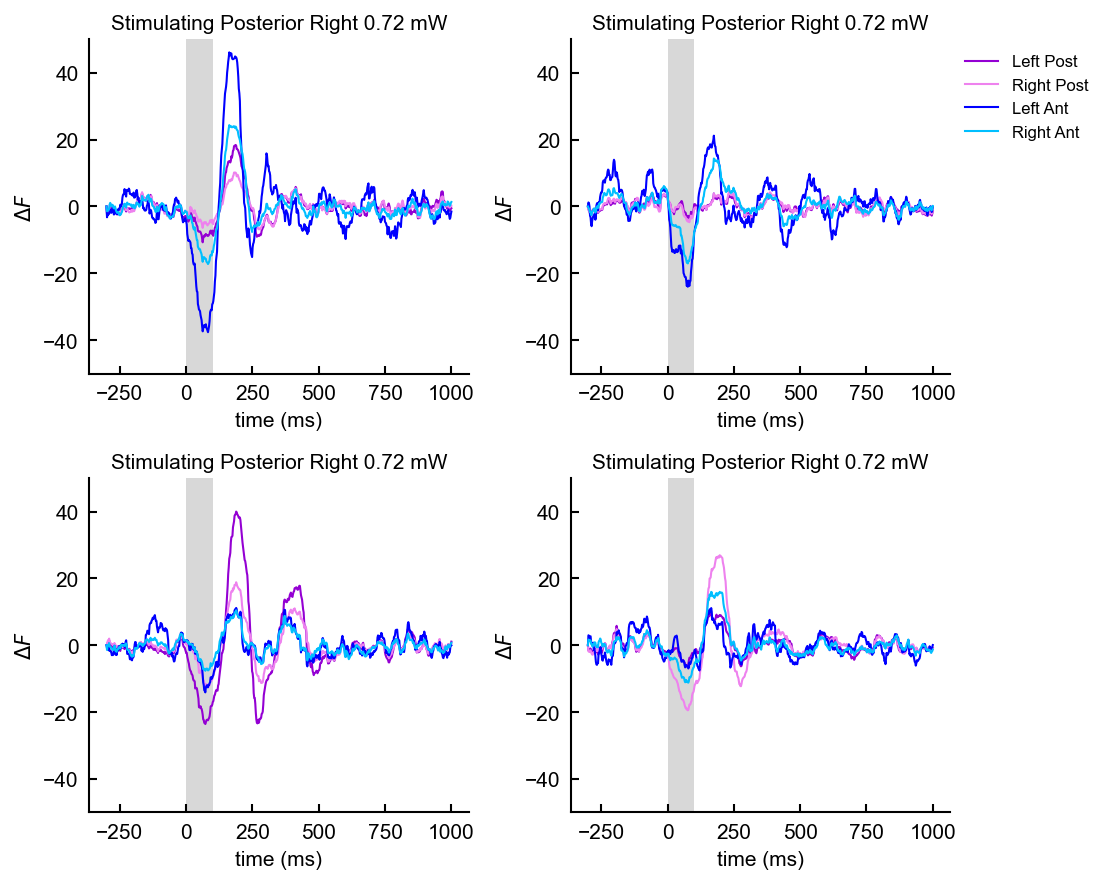

In [70]:
f = plt.figure(figsize=(7.5,6))
gs=mpl.gridspec.GridSpec(2,2)

ax = plt.subplot(gs[0]) #top left
contralatTraces(ax,data=dataOp425_AB,galvoX=0,galvoY=0)

ax = plt.subplot(gs[1]) #top right
contralatTraces(ax,data=dataOp425_AB,galvoX=3.3,galvoY=0,legend=True)

ax = plt.subplot(gs[2]) #bottom left
contralatTraces(ax,data=dataOp425_AB,galvoX=0,galvoY=3.3)

ax = plt.subplot(gs[3]) #bottom right
contralatTraces(ax,data=dataOp425_AB,galvoX=3.3,galvoY=3.3)

f.tight_layout()